# Bernoulli Trials And Problem Setup in a Discrete Scenario

- Imagine that we have a coin (very original, I know) and we want to determine whether it is fair or not. This problem seems so simple to figure out, but introduces a variety of nuanced and complex statistical theories and techniques that will be extremely valuable for any data scientist/ML engineer to understand.
    - First, figuring this out requires an understanding of the difference between discrete and continuous probabilities.
        - **Discrete probabilities** deal with outcomes that are finite and countable: 
            - The number of heads in n trials of flipping a coin
            - The number of customers who convert in a given time period
            - The number of times customers click an ad in a given time period
        - **Continuous probabilities** deal with outcomes that occur over a continuous interval:
            - Estimating the heights of individuals
            - Modeling customer LTV
            - Modeling how long food delivery takes

<br>

- This, of course, is a use-case for discrete probability.
- The probability of a **BINARY** individual discrete event occuring can be modeled with a **Bernoulli Distribution**
    - The Bernoulli Distribution measures the probability of one individual and independent binary event occurring and can be modeled by the following equation

**Bernoulli PMF:** $P(x \mid p) = p^x(1-p)^{1-x}$

- A **Probability Mass Function (PMF)** is used to quantify probabilities (y-axis) among discrete variables (x-axis)
- Let's break this equation down:
    - **x:** The observed outcome of a single trial (coin flip), in this case a binary x=1 or x=0, where 1 represents a success (heads) and 0 represents a failure (tails)
    - **p:** The UNKNOWN probability of success; the true chance of the coin landing on heads. This is ultimately what we don't know and want to estimate.
    - **$p^x$:** If x=1, this term becomes p; if x=0, it becomes 1. So it captures the probability and likelihood contributions from a successful trial.
    - **$(1-p)^{1-x}$:** Similarly, this term captures the probability contribution from a single trial that results in failure.
    - **$P(x \mid p)$:** The full probability of observing a specific outcome x given the true underlying probability of success p
- If the coin is fair, then the probability of success, p, should be 50%
    - Below you can see a Bernoulli distribution with 

In [ ]:
#TODO: Would probably good to briefly touch on 
    #TODO: Bernoulli + Binomial vs Categorical and Multinomial Distributions

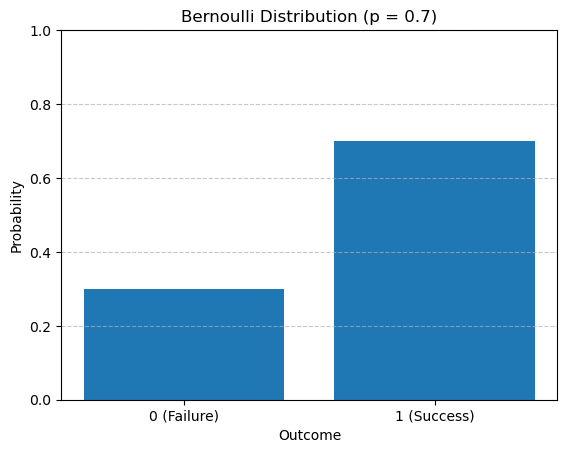

In [289]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli_pmf(x: np.array, p: float) -> np.array:
    '''
    Computes a Bernoulli probability mass function that represents the discrete probability distribution of success and failure for a given Binary trial.

    PARAMS:
        - x: An array representing outcomes of a binary trial [0,1]
        - p: The probability of success in such a trial

    RETURNS:
        - The probabilities of success and failure; Bernoulli distribution
    '''

    return p**x * (1-p)**(1-x)

p = 0.7
x = np.array([0,1])

bernoulli_distribution = bernoulli_pmf(x,p)

# Plotting
plt.bar(x, bernoulli_distribution, tick_label=["0 (Failure)", "1 (Success)"])
plt.title(f"Bernoulli Distribution (p = {p})")
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# The Intuitive Connection Between Binomial and Beta Distributions

- Most statistics textbooks and courses start with Frequentist statistics, but I'm actually going to flip things and discuss Bayesian statistics first.
- When most people think of statistics, they think of Frequentism. Not because it's better than Bayesian statistics, in fact many would argue the opposite, but because it's traditionally what's taught in school.
- Frequentism is the understanding of statistics and probability through the lens of how frequently an event occurs, as opposed to what we believe prior to observing data and updating that belief given data, which describes Bayesian statistics.

<br>

- Given we haven't observed any coin flips, it's only natural to assume some prior success rate based on what we already know about coins. 
- We know that generally coins tend to be fair, so a very rational assumption is that if we flipped the coin 4 times (n=4), we would observe 2 heads/successes (k=2 or alpha=2) and 2 tails/failures (beta = 2).

<br>

- Using those pseudo (assumed) alpha (success; $\alpha$) and beta (failure; $\beta$) values, we can determine something called a beta prior.
- The prior is a **Beta Probability Density Function (PDF):**
$P(\theta \mid \alpha, \beta) = \frac{\theta^{\alpha - 1}(1 - \theta)^{\beta - 1}}{\mathrm{B}(\alpha, \beta)} \quad \text{for } 0 < \theta < 1, \text{where } \mathrm{B}(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} = \frac{(\alpha - 1)! \, (\beta - 1)!}{(\alpha + \beta - 1)!}$

    - The **Beta PDF** represents our belief about the value of some unknown parameter ($\theta$) - primarily in the context of a Binomial distribution, which we'll discuss next. In this case our unknown parameter, $\theta$, represents the probability of success, $p$.
    - This particular Beta PDF, the prior, quantifies our initial belief about which probability between 0 and 1 is the true success rate before we observe any data.
    - It's y-axis shows probability density, which - unlike a probability mass function - it not itself a probability.
        - Rather, it is a value that, when integrated over a domain, yields a probability.
        - Think of it as representing the concentration of probability of different values of $p$, but remember that at any given point it has no direct probabalistic interpretation.

Because we know coins tend to be fair, we will assume the following probability of success: 0.4954128440366973, which is the global maximum of our prior


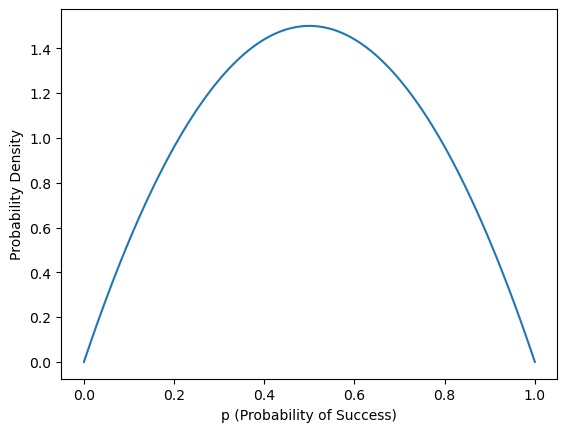

In [263]:
import math

def beta_norm(alpha: int, beta: int) -> float:
    '''
    Computes the beta normalization constant (the Beta function) for the Beta Distribution. This constant ensures the density integrates to 1.

    NOTE: In Bayesian updating, a similar integration over the parameter space yields the marginal likelihood of the observed data, which will be explored later.
    
    PARAMS:
        - alpha: Number of successes in n trials
        - beta: Number of failures in n trials

    RETURNS:
        - The beta normalization constant described above
    '''
    
    return (math.factorial(alpha-1) * math.factorial(beta-1)) / math.factorial(alpha + beta - 1)


def beta_pdf(alpha: int, beta: int, p_hat_cont: np.ndarray[float]) -> np.ndarray[float]:
    '''
    Computes the beta distribution using its probability density function.

    PARAMS:
        - alpha: Number of successes in n trials
        - beta: Number of failures in n trials
        - p_hat_cont: An array of evenly spaced probability values [0,1]

    RETURNS:
        - The probability density values in a beta distribution
    '''

    beta_normalization_constant = beta_norm(alpha, beta)
    beta_dist = (p_hat_cont**(alpha-1) * (1-p_hat_cont)**(beta-1)) / beta_normalization_constant
    return beta_dist


#Set pseudo values and a continuous probability range [0,1], p_hat_cont
pseudo_alpha = 2
pseudo_beta = 2
p_hat_cont = np.linspace(0,1,110)

#Compute beta prior
beta_dist_prior = beta_pdf(pseudo_alpha, pseudo_beta, p_hat_cont)

#Select the mode of the beta prior - the value of p that maximizes the Probability Density Function (PDF)
prior = p_hat_cont[beta_dist_prior.argmax()]
print(f"Because we know coins tend to be fair, we will assume the following probability of success: {prior}, which is the global maximum of our prior")

#Plot the probabilities against the probability density
plt.plot(p_hat_cont, beta_dist_prior)
plt.xlabel("p (Probability of Success)")
plt.ylabel("Probability Density")
plt.show()

- **Binomial Probability Mass Function (PMF):** $P(k \mid n, p) = {n \choose k}p^k(1-p)^{n-k}$
    - This function provides the probability of observing exactly $k$ successes in $n$ independent trials, where each trial follows a Bernoulli distribution that assumes a known probability of success, $p$
    - The Binomial PMF can be visualized either by using a closed-form equation or by repeatedly sampling $n$ Bernoulli trials and plotting the distribution of success counts $k$
        - Below I will show that the same distribution can be derived both ways, highlighting the **connection between the Bernoulli and Binomial distributions**

<br>

- Here, we are using our prior probability of success computed from a beta distribution of pseudo observations
- This will tell us the probability of observing each possible discrete value, based on the pre-existing probability of success.

<br>

- I've used the Beta PDF and Bernoulli/Binomial PMFs. What's the formal difference between a PMF and PDF?
    - **PMF (probability mass function)** is used to quantify probabilities (y-axis) among discrete variables (x-axis)
    - **PDF (probability density function)** is used to quantify our belief about continuous parameters, like probabilities or means (x-axis), using probability density (y-axis)

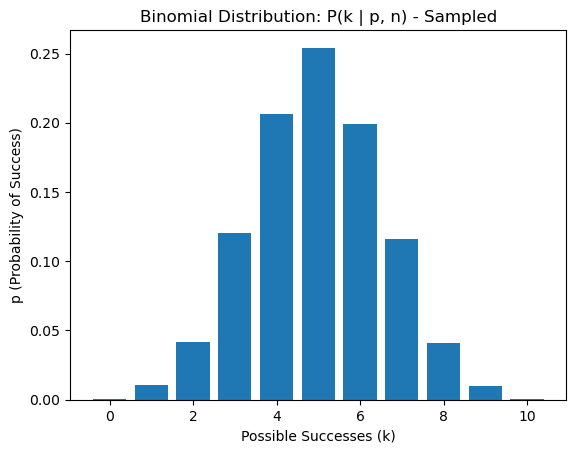

In [264]:
from random import random

#Set constants n trials and 0-10 as discrete k vals for plotting
n=10
k_vals = np.arange(0,n+1)

#Repeatedly sample from Bernoulli distribution
samples = []
for _ in range(10000):
    k_count = 0
    for i in range(n):
        if random() > 1-prior:
            k_count+=1
    samples.append(k_count)

#Aggregate samples for plotting
sampled_binomial_distribution = [0]*(n+1)
for i in samples:
    sampled_binomial_distribution[i] += 1
sampled_binomial_distribution = np.array(sampled_binomial_distribution)

#Plot Binomial distribution
plt.bar(k_vals, sampled_binomial_distribution/sampled_binomial_distribution.sum())
plt.ylabel("p (Probability of Success)")
plt.xlabel("Possible Successes (k)")
plt.title('Binomial Distribution: P(k | p, n) - Sampled')
plt.show()

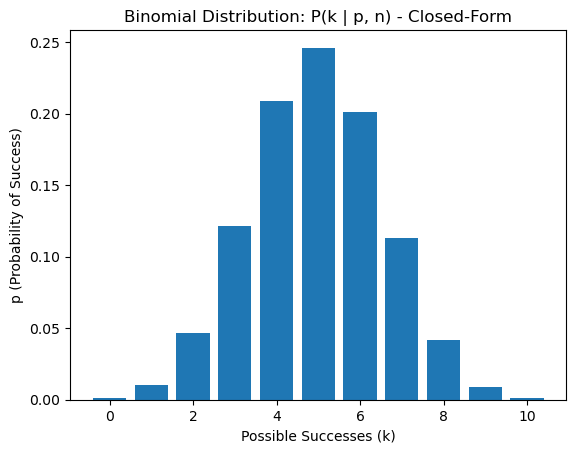

In [265]:
def n_choose_k(n: int, k: int) -> int:
    '''
    Implementation of n choose k - interpret result as "there are ~result~ ways to choose k from n"
    
    NOTE: used in the Binomial PMF

    PARAMS:
        - n: Total trials
        - k: Number of successes in n trials

    RETURNS:
        - The number of ways to choose k elements from a set of n elements, also known as the binomial coefficient (n choose k)
    '''
    
    # return math.comb(n,k) #A more efficient implementation of the line below, which is expanded for pedagogical purposes
    return math.factorial(n) //(math.factorial(k) * math.factorial(n - k))


def binomial_pmf(n: int, k: int, p: float|np.ndarray[float]) -> float:
    '''
    Produces a binomial PMF
        
    NOTE: If an array is passed in as p, then will produce a binomial probability distribution as multiplication and power operations will execute element-wise

    PARAMS:
        - n: Total trials
        - k: Number of successes in n trials
        - p: Unknown probability of success (we are inferring this)

    RETURNS:
        - The probability of getting k successes in n independend Bernoulli trials given an assumed probability of success
    '''
    
    return n_choose_k(n, k) * ((p**k) * (1-p)**(n-k))

#Build binomial distribution
binomial_distribution = [binomial_pmf(n, k_val, prior) for k_val in k_vals] #remember - k_vals are just the possible discrete outcomes

#Plot distribution against possible discrete outcomes
plt.bar(k_vals, binomial_distribution)
plt.ylabel("p (Probability of Success)")
plt.xlabel("Possible Successes (k)")
plt.title('Binomial Distribution: P(k | p, n) - Closed-Form')
plt.show()

- We would use the Binomial PMF, $P(k \mid n,p)$, to quantify the probability of observing $k$ successes of $n$ trials when the probability, $p$, is known
- **Here's the problem:** In the real world, we typically **don't** know the underlying probability of success, $p$
    - The best we can do is to iteratively update our belief about what that probability is based on observed data - this is where **Bayesian inference** comes in
    - In Bayesian inference, we can use the Binomial PMF to help us update our belief about $p$ by repurposing it as a likelihood function $L(p \mid n,k) = P(k \mid n,p)$ that expresses how plausible different values of $p$ are given observed data ($k$ and $n$), or how probable the observed data ($k$ and $n$) is under a range of different values of $p$.
- **Binomial Likelihood:** $L(p \mid n,k) = {n \choose k}p^k(1-p)^{n-k}$

<br>    

- Let's assume we run a test and observe only 3 successes ($k$) in 10 trials ($n$) - a potentially improbable outcome given a believed underlying success rate of 50% (see PMF in last cell) - should we still assume the coin is fair and should maintain a 50% probability of success?
    - Maybe, but maybe not. Simply put, there isn't enough data to substantiate a 50% probability of success, so we should update our initial belief (our prior) about the success rate using the data we've observed
    - Since the true probability of success is unknown, we use the binomial likelihood - evaluated as a function of $p$ - to express how plausible different values of $p$ are given that we observed 3 successes ($k$) in 10 trials ($n$)
        - This just means we're going to use the Binomial PMF, holding $n$ and $k$ at 10 and 3, respectively, and plug in every $p$ value between 0 and 1 to create a distribution that allows us to observe which probability is most likely
            - I use the word "likely" very specifically here because probabilities and likelihoods are different. 
                - Probability -> Quantifies the chance of an event, discrete (think probability mass) or derived from a continuous distribution (by integrating over an interval - think probability density), and is normalized such that its value is constrained between 0 and 1 and its distribution integrates to 1
                - Likelihood -> Describes the relative plausability of each possible parameter ($\theta$) value in a range, in this case probability, given observed data. Importantly, likelihood does not have a fixed scale and is not constrained to sum or integrate to 1, so it is not a probability distribution. It is used to compare how well different parameter values explain data.
                - Probability Density -> Specifically describes the relative concentration of probabliity along some continuous parameter ($\theta$), in this case probability. You can derive the probability of a particular parameter lying within an interval [a,b] by integrating the probability density function from a to b. The result of integrating over the entire domain will always be 1.
                
<br>                
                    
- Below we evaluate the Binomial PMF as a function of $p$ given $k$ and $n$ in order to determine each probability's likelihood over a domain of continuous probabilities between 0 and 1

The probability with the highest likelihood is 0.30275229357798167


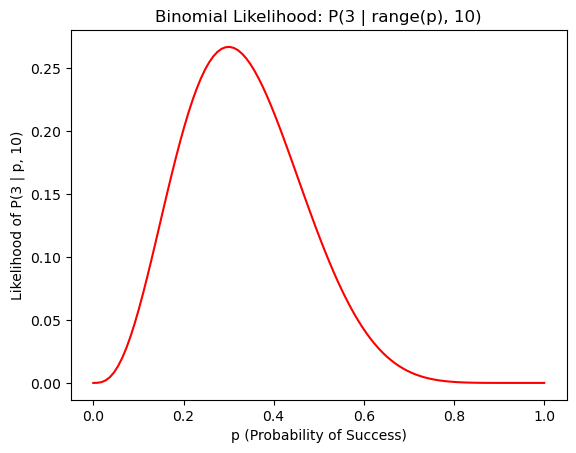

In [266]:
#Define k, alpha, beta, and continuous array of possible probabilities of succes (p)
k = 3
observed_alpha = k
observed_beta = n-k
p_hat_cont = np.linspace(0,1,110)

#Build binomial PMF
binomial_likelihood = binomial_pmf(n, k, p_hat_cont)

print(f"The probability with the highest likelihood is {p_hat_cont[binomial_likelihood.argmax()]}")

#Plot binomial likelihood
plt.plot(p_hat_cont, binomial_likelihood, color='red')
plt.ylabel(f"Likelihood of P({k} | p, {n})")
plt.xlabel("p (Probability of Success)")
plt.title('Binomial Likelihood: P(3 | range(p), 10)')
plt.show()

- Unsurprisingly, what we observe in the cell above is that the probability with the highest likelihood, given an observed 3 successes ($k$) of 10 trials ($n$) is about 30%
    - Here's the thing, we know the sample size is small and we know the coin is still pretty likely to be fair (have a 50% probability of success) - so we shouldn't really assume that the success rate of heads when flipping the coin should be 30%
        - Logically, based on what we know about coins in general and this particular coin, the most likely success rate should probably be somewhere between 30% and 50%

<br>

- So rather than take the 30% and run with it, instead we should UPDATE our prior belief to reflect the observed reality
    - In other words, we should combine the assumed 50% and observed 30% successes of probability in a statistically rigorous way in order to most accurately reflect reality
        - How do we do this?

<br>        

- We can use Bayes Theorem of conditional probability as a mechanism to update our beliefs about the unknown probability of success, $p$
    - The distribution representing our UPDATED beliefs is called a posterior distribution - you update a prior with observed data to get a posterior

<br>

- Bayes Theorem: $P(A|B) = (P(A) * P(B \mid A)) / P(B)$
- We can reinterpret this theorem for our problem as: 
    - $P(p \mid data) = (P(p) * P(data \mid p)) / P(data)$
    - $P(p \mid data)$ -> What is our updated belief about the unknown probability of sueccess, $p$, after observing data?
        - This is the **posterior probability density** and it quantifies the concentration of probability for different values of $p$ after taking observed data into account.
        - It is derived by combining our prior believe about $p$ with the likelihood across a range of probabilities ($p$) given observed data, and then normalizing by the marginal likelihood
    - $P(p)$ = beta_dist_prior -> Our initial belief about $p$
    - $P(data \mid p)$ = binomial_likelihood -> The probability of observing the data given a range of $p$ between 0 and 1, or the relative plausability of different values of $p$ in the range [0,1] in light of the observed data (remember: $L(p \mid n,k) = P(k \mid n,p)$)
    - $P(data)$ = ? -> The marginal likelihood that ensures the posterior integrates to 1 (we'll come back to this, don't worry)

<br>

- $(P(A) * P(B \mid A))$
- We start by multiplying our initial belief (prior) and the probability of success' likelihood distibution after observing $k$ successes in $n$ trials
    - This product is proportional to the posterior density computed with a beta distribution, but is unnormalized, so it doesn't integrate to 1
    - Dividing by the marginal likelihood $P(data)$ normalizes the product, resulting in a proper posterior probability density for $p$ that integrates to 1
    - Notably, the mode of the unnormalized posterior is the same as the normalized posterior, which we can observe later in this notebook.

<br>

- This actually touches on a concept called a **conjugate**
    - In Bayesian statistics, a prior distribution is called conjugate to a likelihood function if the posterior distribution belongs to the same family as the prior
    - Said another way, because the result of updating the prior Beta distribution using the Binomial likelihood is also a Beta distribution, the Beta distribution is conjugate to the Binomial likelihood
        - This greatly simplifies Bayesian updating because it means we can ALSO update beliefs by just updating the alpha and beta values used as parameters in the Beta PDF to evaluate the updated distribution
        - If you are confused about this, keep going a few more cells and the idea should become more clear.

The most likely probability of success is (mode of the distribution) 0.3302752293577982.


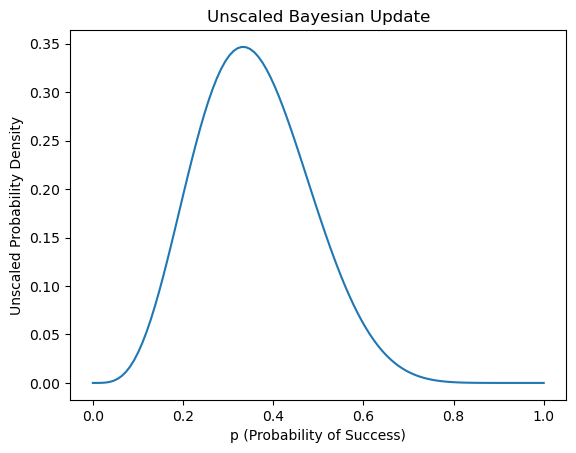

In [267]:
#Build unnormalized posterior distribution by taking the product of the beta prior and binomial likelihood
unnormalized_posterior = beta_dist_prior*binomial_likelihood

print(f"The most likely probability of success is (mode of the distribution) {p_hat_cont[unnormalized_posterior.argmax()]}.")

#Plot the unnormalized posterior against a continuous range of possible probabilities
plt.plot(p_hat_cont, unnormalized_posterior)
plt.xlabel("p (Probability of Success)")
plt.ylabel("Unscaled Probability Density")
plt.title('Unscaled Bayesian Update')
plt.show()

- Let's come back to $P(B)$ - the marginal likelihood - what is it anyways?
    - The marginal likelihood is the total probability of observing the data across all possible values of $p$ weighted by the prior distribution
        - In other words, it's the integral of the unnormalized posterior distribution that we just computed! Dividing the distribution by it will scale the integral of the distribution to 1 
    - Practically speaking, it is a constant that normalizes our unscaled probability density to a valid PDF
- We can compute $P(B)$ by integrating the unnormalized posterior distribution from 0 to 1

In [268]:
marginal_likelihood_np = np.trapz(unnormalized_posterior, p_hat_cont)
print("The Marginal Likelihood (integral of unnormalized posterior):", np.round(marginal_likelihood_np,8))

The Marginal Likelihood (integral of unnormalized posterior): 0.11188811


- Let's look at another way to compute our updated Beta distribution
    - It's actually as simple as just computing a new beta distribution given all the observations we've seen/believed
        - Remember this is allowed because the Beta prior is conjugate to the Binomial likelihood

The most likely probability of success (mode of the distribution) is 0.3302752293577982.      
Notice how the most likely success rate lives between 0.3 and 0.5 here.       
Notice also how similar this distribution is to the one we just calculated with Bayes' Therom above AND how the most likely probabilities of success are THE SAME.


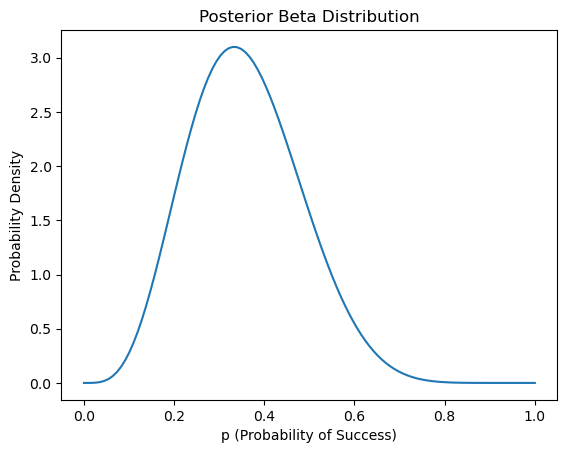

In [269]:
#We just add our believed successes and failures to the ones we actually observed to update the values
alpha_updated = pseudo_alpha + observed_alpha 
beta_updated = pseudo_beta + observed_beta

#Then very simply build a new beta distribution to see where we should now believe the most likely probability of success lies
beta_normalization_constant = beta_norm(alpha_updated, beta_updated)
beta_dist_posterior = (p_hat_cont**(alpha_updated-1) * (1-p_hat_cont)**(beta_updated-1)) / beta_normalization_constant

print(f"The most likely probability of success (mode of the distribution) is {p_hat_cont[beta_dist_posterior.argmax()]}.\
      \nNotice how the most likely success rate lives between 0.3 and 0.5 here. \
      \nNotice also how similar this distribution is to the one we just calculated with Bayes' Therom above AND how the most likely probabilities of success are THE SAME.")

#Plot the posterior beta distribution
plt.plot(p_hat_cont, beta_dist_posterior)
plt.xlabel("p (Probability of Success)")
plt.ylabel("Probability Density")
plt.title("Posterior Beta Distribution")
plt.show()

- Since the posterior is proportional to the unnormalized posterior (beta prior * binomial likelihood)...
- Multiplying the inverse of the posterior by the unnormalized_posterior should give the EXACT SAME value as integrating the product, or computing $P(B)$, which you can see it does below
- Obtaining the same $P(B)$ through integrating the unnormalized prior and algebraically extracting it from the posterior Beta distribution confirms that the Beta prior and Binomial likelihood behave as conjugate partners.
    - Of course, a formal proof of conjugacy would require demonstrating this is valid for all parameter values, but this illustration should help build some intuition about the **connection** between the two!

[0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.1118

/var/folders/nz/ht8s09bd1knct30kv0qm6c040000gn/T/ipykernel_40253/253594508.py:1: RuntimeWarning: divide by zero encountered in divide
  derived_marginal_likelihood = ((1/beta_dist_posterior)*(beta_dist_prior*binomial_probability_cont))
/var/folders/nz/ht8s09bd1knct30kv0qm6c040000gn/T/ipykernel_40253/253594508.py:1: RuntimeWarning: invalid value encountered in multiply
  derived_marginal_likelihood = ((1/beta_dist_posterior)*(beta_dist_prior*binomial_probability_cont))


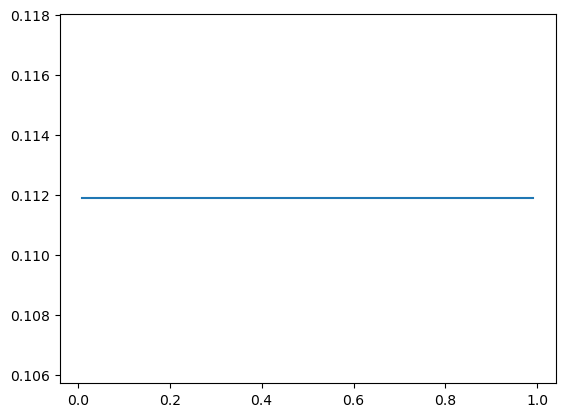

In [270]:
derived_marginal_likelihood = ((1/beta_dist_posterior)*(beta_dist_prior*binomial_likelihood))
print(derived_marginal_likelihood[1:-1]) #Removing the marginal likelihood of 0 and 1, which is computed as inf
plt.plot(p_hat_cont, derived_marginal_likelihood)

# Credible intervals, CDFs, PPFs, and Making Predictions

- Alrighty, now (hopefully) we understand the connection between the Binomial and Beta distributions. 
- The Beta distribution is conjugate to Binomial Likelihood and provides a probability density along a range of possible probabilities that could be the true success rate of some event.
- So what are we supposed to do with this information?
    - At a high level, we can do a lot of things - this is a powerful tool for making business decisions, providing a probabalistic range within which an unknown parameter (conversion rate, churn rate, etc) is believed to lie.
        - A/B Testing (this will be our focus)
        - Fraud Detection
        - Supply Chain Optimization
        - Etc

</br>

- First of all we can now quantify the probability of the true success rate, $p$, of an event landing between two probabilities, $p$.
- To do this, we'll need to review **Cumulative Distribution Functions (CDF)**
    - A CDF is a function that represents the cumulative probability (area under the curve) of a PDF from one end of the domain up to a given point. It is formally computed as an integral of the probability density under a PDF curve (continuous case) or the sum of the probability mass in a PMF (discrete case)
        - **Continuous:** $F(x) = \int_{-\infty}^{x} f(t) \, dt$
        - **Discrete:** $F(x) = \sum_{t \leq x} P(X = t)$
        - It can be used to determine the probability that a given parameter lies between two values (the lower and upper bounds of a probability interval). It's important to note that, just like a PDF, you should never try to interpret a single point - only ranges between points.
        - More importantly, in Bayesian analysis, we can use the CDF to find the range of values that contain the parameter with a particular probability
            - This is called the **Credible Interval**, which is effectively the Bayesian counterpart to the Frequentist's **Confidence Interval**, a relationship we'll explore further later in the notebook.

</br>

- By inverting the CDF, we construct what's called a **Percent Point Function (PPF)**, which allows us to find the corresponding parameter boundaries to any upper and lower probability bounds.
    - **While the CDF is a function of a parameter that yields cumulative probabilities, the PPF is a function of cumulative probabilities that yield parameters.**
        - The PPF is ultimately how we find the parameter values associated with lower and upper probability boundaries.
        - Put more simply, the PPF allows us to measure how certain we are that the true probability of success lies within some range of probabilities.

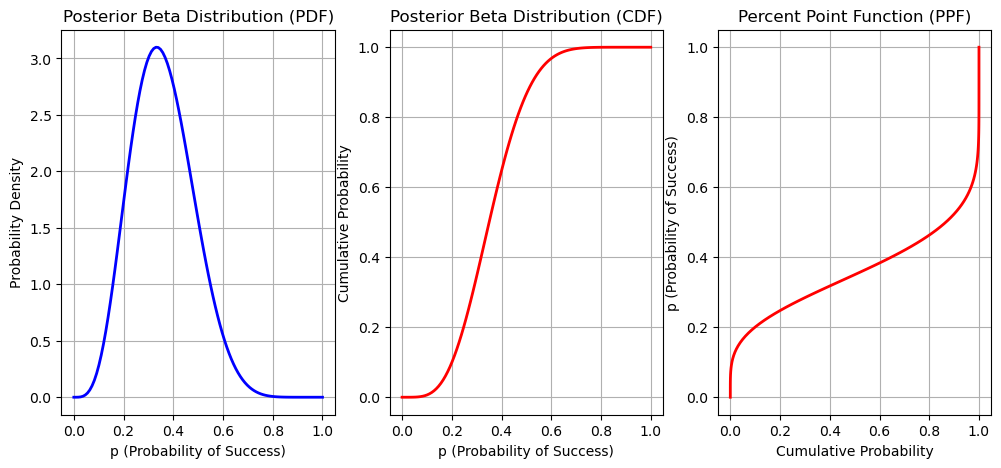

In [271]:
from scipy.stats import beta

#Create array of probability values from 0 to 1
p_values = np.linspace(0, 1, 1000)

#Compute CDF of Beta distribution over probability values
cdf_values = beta.cdf(p_hat_cont, alpha_updated, beta_updated)

#Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

#Plot PDF on left subplot
axes[0].plot(p_hat_cont, beta_dist_posterior, color='blue', lw=2)
axes[0].set_xlabel("p (Probability of Success)")
axes[0].set_ylabel("Probability Density")
axes[0].set_title("Posterior Beta Distribution (PDF)")
axes[0].grid(True)

#Plot CDF on middle subplot
axes[1].plot(p_hat_cont, cdf_values, color='red', lw=2)
axes[1].set_xlabel("p (Probability of Success)")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Posterior Beta Distribution (CDF)")
axes[1].grid(True)

#Plot PPF on right subplot
axes[2].plot(cdf_values, p_hat_cont, color='red', lw=2)
axes[2].set_xlabel("Cumulative Probability")
axes[2].set_ylabel("p (Probability of Success)")
axes[2].set_title("Percent Point Function (PPF)")
axes[2].grid(True)

- Below is an example of how we might construct a 95% credible interval.
    - We simply find the corresponding y-values (parameters) to the 2.5% and 97.5% cumulative probability x-values on the PPF
    - This will give us boundaries that we can interpret as follows:
        - We are 95% certain that the true underlying probability of success, given our prior and observed data, lies between the x-values derived from the PPF (observe the printed statement for filled in x-values).

95.0% credible interval: [0.139, 0.614]
We can be 95.0% certain that the true underlying probability of success, given our prior and observed data, lies between these probabilities [0.139, 0.614]
So can we be sure that our coin is fair? No, we don't have enough evidence/data yet.


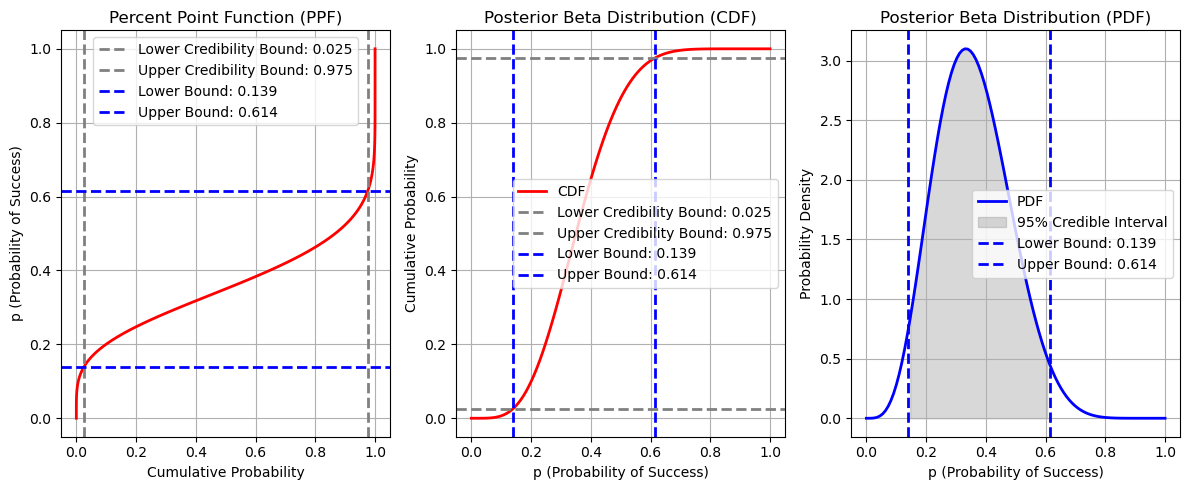

In [272]:
lower_cred_bound = 0.025
upper_cred_bound = 0.975
cred_pct = upper_cred_bound-lower_cred_bound

lower_bound_bayes = beta.ppf(lower_cred_bound, alpha_updated, beta_updated)
upper_bound_bayes = beta.ppf(upper_cred_bound, alpha_updated, beta_updated)
print(f"{100*round(cred_pct, 2)}% credible interval: [{lower_bound_bayes:.3f}, {upper_bound_bayes:.3f}]")
print(f"We can be {100*round(cred_pct, 2)}% certain that the true underlying probability of success, given our prior and observed data, lies between these probabilities [{lower_bound_bayes:.3f}, {upper_bound_bayes:.3f}]")
print("So can we be sure that our coin is fair? No, we don't have enough evidence/data yet.")


fig, axes = plt.subplots(1, 3, figsize=(12, 5))

#Plot PPF on left subplot
axes[0].plot(cdf_values, p_hat_cont, color='red', lw=2)
#Draw horizontal dashed lines at the credible interval bounds and display intersecting x values 
axes[0].axvline(lower_cred_bound, color='grey', linestyle='--', lw=2, label=f'Lower Credibility Bound: {lower_cred_bound:.3f}')
axes[0].axvline(upper_cred_bound, color='grey', linestyle='--', lw=2, label=f'Upper Credibility Bound: {upper_cred_bound:.3f}')
axes[0].axhline(lower_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Lower Bound: {lower_bound_bayes:.3f}')
axes[0].axhline(upper_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Upper Bound: {upper_bound_bayes:.3f}')
axes[0].set_xlabel("Cumulative Probability")
axes[0].set_ylabel("p (Probability of Success)")
axes[0].set_title("Percent Point Function (PPF)")
axes[0].grid(True)
axes[0].legend()


#Plot CDF on middle subplot
axes[1].plot(p_hat_cont, cdf_values, color='red', lw=2, label="CDF")
#Draw vertical dashed lines at the credible interval bounds and display intersecting x values 
axes[1].axhline(lower_cred_bound, color='grey', linestyle='--', lw=2, label=f'Lower Credibility Bound: {lower_cred_bound:.3f}')
axes[1].axhline(upper_cred_bound, color='grey', linestyle='--', lw=2, label=f'Upper Credibility Bound: {upper_cred_bound:.3f}')
axes[1].axvline(lower_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Lower Bound: {lower_bound_bayes:.3f}')
axes[1].axvline(upper_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Upper Bound: {upper_bound_bayes:.3f}')
axes[1].set_xlabel("p (Probability of Success)")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Posterior Beta Distribution (CDF)")
axes[1].grid(True)
axes[1].legend()

#Plot PDF on right subplot
axes[2].plot(p_hat_cont, beta_dist_posterior, color='blue', lw=2, label="PDF")
#Shade area in credible interval
axes[2].fill_between(p_hat_cont, beta_dist_posterior, 
                    where=(p_hat_cont >= lower_bound_bayes) & (p_hat_cont <= upper_bound_bayes),
                    color='grey', alpha=0.3, label="95% Credible Interval")
#Plot corresponding lower and upper bounds that encapsulate the 95% credible interval                     
axes[2].axvline(lower_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Lower Bound: {lower_bound_bayes:.3f}')
axes[2].axvline(upper_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Upper Bound: {upper_bound_bayes:.3f}')                
axes[2].set_xlabel("p (Probability of Success)")
axes[2].set_ylabel("Probability Density")
axes[2].set_title("Posterior Beta Distribution (PDF)")
axes[2].grid(True)
axes[2].legend()


plt.tight_layout()
plt.show()

# From Bayesian to Frequentist: An Introduction to Maximum Likelihood Estimation
- So far we used our prior knowledge of coins to estimate a prior, then observed 10 trials ($n$) with 3 successes ($k$), and using the observed data were able to update our beliefs about this particular coin given those observations.
    - This is the Bayesian approach to estimating the true underlying success rate of a parameter distribution in order to determine whether our coin is fair.
- Now let's take the **Frequentist approach** to estimating the true underlying success rate in order to determine whether our coin is fair.

<br>

- One critically important Frequentist method to estimate a the parameter(s) of a distribution given observed data is called **Maximum Likelihood Estimation (MLE)**.
    - Before I get into MLE, it's worth briefly touching on the difference between probability and likelihood again - this time in a way that will directly relate to MLE.
        - **Probability** describes the chance of observing data or point(s) on a distribution given the parameters that describe that distribution
            - A Binomial distribution's **parameter** is the underlying probability of success **p**
            - A Normal distribution's **parameters** are its **mean ($\mu$)** and **standard deviation ($\sigma$)**
        - **Likelihood** describes the plausibility of different parameter values given observed data - it describes how well a particular set of parameters explain the data we've seen
            - In other words, <u>given observed data we can find the most likely parameter values of a distribution by maximizing the likelihood function</u>
                - The question is how? This is where Maximum Likelihood Estimation comes in.

<br>

- Now I'm going to reiterate a few equations and interpretations for connective purposes:
- **Bernoulli PMF:** $P(x \mid p) = p^x(1-p)^{1-x}$
    - Describes the probability of a single binary trial (success/failure), where $x \epsilon {1,0}$, given an underlying probability of success
        - $x=1$ typically represents 'success' and $x=0$ represents 'failure'
- **Bernoulli Likelihood:** $ L(p \mid x_1, \dots, x_n) = \prod_{i=1}^n p^{x_i}(1 - p)^{1 - x_i}$
    - For a set of $n$ independent binary trials, we take the product of the individual Bernoulli PMFs to form the likelihood function - which tells us how plausible a given value $p$ (the unknown probability of success) is, given observed data
    - The likelihood of $n$ independent observations is the product of individual probabilities, or $L(\theta) = \prod_{i=1}^n P(x_i \mid \theta)$ where $\theta$ represents our parameters, $p$ (the underlying probability of success)
- **Binomial PMF:**  $P(k \mid n, p) = {n \choose k}p^k(1-p)^{n-k}$
    - Describes the probability of observing exactly $k$ successes in $n$ independent Bernoulli trials, which is used when the trial-level data is **aggregated** into counts
- **Binomial Likelihood Function:**  $L(p \mid n, k) = {n \choose k}p^k(1-p)^{n-k}$
    - The Binomial PMF also serves as the likelihood function for summarized data, but it is treated as a function of the unknown parameter probability of success, $p$, given observed data ($n$ and $k$) - rather than being a function of $k$ given $n$ trials and a known probability of success, $p$
    
<br>

- While the Bernoulli PMF models a single trial and the Binomial PMF models an aggregation of many Bernoulli trials, their likelihood functions actually models the exact same thing - repeated binary trials - just at different levels of granularity. In fact, if you look at the code examples below, I've implemented MLE with both so you can see they yield the exact same results.
    - The Bernoulli likelihood applies when you have an array of raw binary data: [1,1,1,0,0,0,0,0,0,0]
    - The Binomial likelihood is used when you summarize (aggregate) that data into counts, $n$, = 10 and successes, $k$, = 3
- Why do we need both of these?
    - We don't! Bernoulli equations are usually associated with a single trial, but can be aggregated as products to build a likelihood function. Typically, we use a Binomial likelihood as it's quite easy and efficient to work with summarized values. Showing both here is purely for the purpose of illustrating the **connection** between the Bernoulli and Binomial likelihood functions
    - If you have raw outcomes for each trial, of course you *could* use the Bernoulli likelihood, but it usually makes more sense to aggregate them and use the Binomial likelihood.

<br>

- Okay now we can finally get to MLE 
- **Maximum Likelihood Estimation** is a frequentist method of estimating a distribution's descriptive parameters such that they maximize the likelihood of seeing the observed data.
    - You can maximize the likelihood functions above directly, but it's actually much more convenient to take their logarithms because they turn the products into sums
        - Why are sums more convenient to work with than products?
            - Sums are easier to differentiate than products.
            - Sums are numercally more stable than products, especially with small probabilities.
            - Sums are faster and more effecient to compute in code than products.
- **Log Bernoulli Likelihood:**  $ log(L(p \mid x_1, \dots, x_n)) = log(\prod_{i=1}^n p^{x_i}(1 - p)^{1 - x_i})$
- **Log Bernoulli Likelihood (Additive Form):**  = $log(L(p \mid x_1, \dots, x_n)) = \sum_{i=1}^{n} log(p^{x_i}) + \sum_{i=1}^{n} log((1 - p)^{1 - x_i})$
- **Log Binomial Likelihood:**  $ log(L(p \mid n, k)) = log({n \choose k}p^k(1-p)^{n-k})$ 
- **Log Binomial Likelihood (Additive Form):** $log(L(p \mid n, k)) = log({n \choose k}) + k*log(p) + (n-k)*log(1-p)$
    - During optimization, we can actually drop $log({n \choose k})$ from this equation as we're optimizing with respect to $p$, which does not exist in the term $log({n \choose k})$

<br>

- **MLE is typically performed by minimizing the negative log likelihood of some observed data, which is mathematically equivalent to maximizing the log-likelihood**
    - Most machine learning algorithms and frameworks are built around minimizing an objective (think "least squares" or "loss functions"). Defining the negative log-likelihood as the "loss" means we can use standard minimization routines, like gradient descent.
    - The negative log likelihood also has a surprisingly intuitive interpretation - it effectively measures the "surprise" of observing data in a distribution. In other words, it answers the question "how surprising are my observations under these parameters?"
        - This is an idea derived from information theory.
        - Imagine we've observed 9999 successes of 10000 trials, seeing a failure would be very surprising and so using a parameter of 0.5 as the probability of success would yield a very large negative log likelihood.
    - Minimizing the negative log-likelihood is effectively searching for parameters $\theta$ (in our case, p, the probability of success) that reduce the total 'surprise' over all observed data
    - The intuition behind negative log-likelihood is actually rather natural even though it might sound complex.
        - We'll be using the Binomial PMF to model the probability of observing exactly $k$ successes in $n$ independent Bernoulli trials given some probability of success, $p$.
        - However, we'll treat this PMF as a likelihood function of $p$, effectively plugging in a bunch of values of $p$ to see which one yields the highest probability of being the true underlying parameter (the highest "parameter probability") given the observed data ($n$ and $k$), which we'll hold fixed given our observations.
        - Since we'll be wrapping the Binomial likelihood function in a logarithm, which increases monotonically, a high "parameter probability" will result in a near zero number but a low one will result in a large negative number.
        - The thing is, we want low probabilities to result in large positive numbers that we can consider an objective to minimize toward zero.
        - By simply negating the logarithm, we have a function that models the desired behavior.

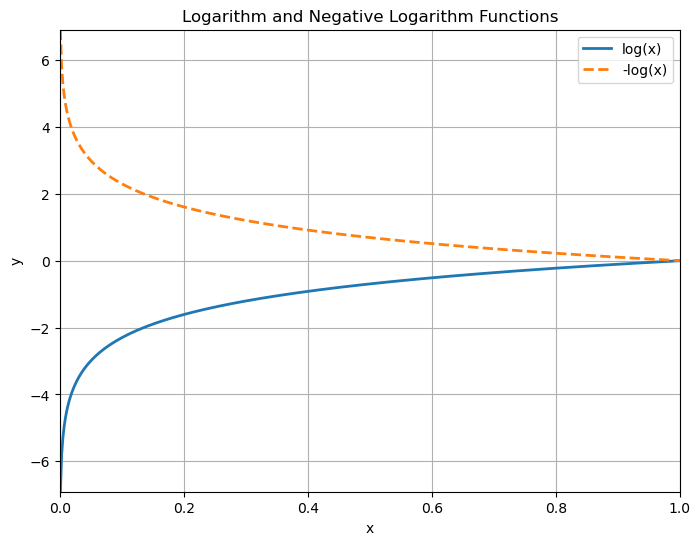

In [273]:
#Visualizing logs and negative logs
#Define domain, avoid 0 bc log(0) is undefined
x = np.linspace(0.001, 1, 500)
log_x = np.log(x)          # Natural logarithm
neg_log_x = -np.log(x)     # Negative natural logarithm

#Plot log and negative log
plt.figure(figsize=(8, 6))
plt.plot(x, log_x, label='log(x)', linewidth=2)
plt.plot(x, neg_log_x, label='-log(x)', linewidth=2, linestyle='--')
plt.title('Logarithm and Negative Logarithm Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.xlim(0, 1)
plt.ylim(min(log_x), max(neg_log_x))
plt.show()


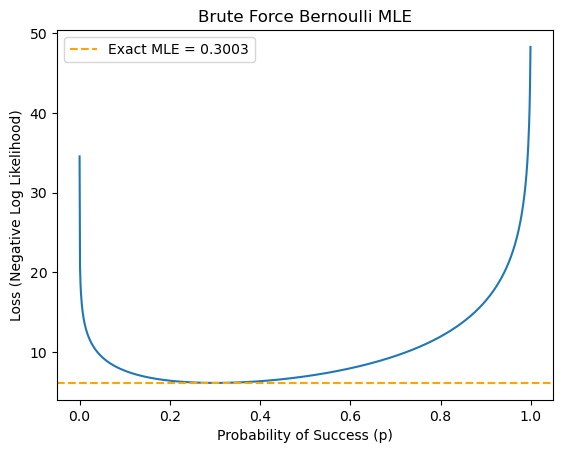

In [381]:
def bernoulli_nll(trials: np.array, params: np.ndarray) -> np.array:
    '''
    Direct implementation of the Log Bernoulli Likelihood (Addative Form), but negated in order to derive negative log likelihood.

    PARAMS:
        - trials: Individual binary trials where 1 is a success and 0 is a failure
        - params: Unknown probabilities of success (we are inferring this)

    RETURNS
        - Negative log likelihoods across all parameter values
    '''
    
    return np.array([-(np.sum(np.log(p**trials)) + np.sum(np.log((1-p)**(1-trials)))) for p in params])


#Create 10 trials with 3 successes
trials = np.array([1,1,1,0,0,0,0,0,0,0])

#Create array of probability, p, values
params = np.linspace(0.00001, .99999, 1000)

#Compute NLL with binomial likelihood
nll_bernoulli = bernoulli_nll(trials, params)

plt.plot(params[:-1], nll_bernoulli[:-1])
plt.axhline(min(nll_bernoulli), color='orange', linestyle='--', label=f'Exact MLE = {params[np.argmin(nll_bernoulli)]:.4f}')
plt.title("Brute Force Bernoulli MLE")
plt.xlabel("Probability of Success (p)")
plt.ylabel("Loss (Negative Log Likelihood)")
plt.legend()
plt.show()

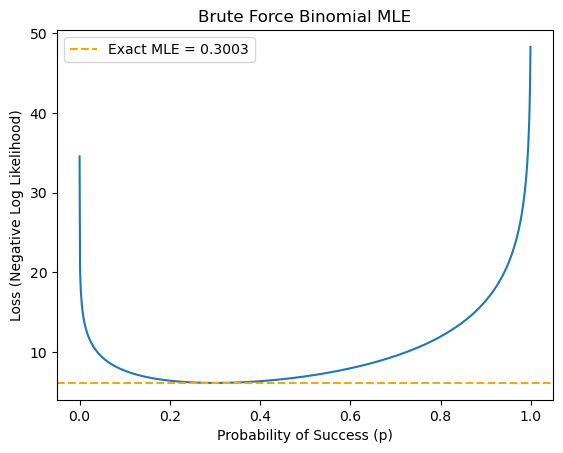

In [382]:
def binomial_nll(n: float, k: int, params: np.ndarray) -> np.array:
    '''
    Direct implementation of the Log Binomial Likelihood (Addative Form), but negated in order to derive negative log likelihood.

    PARAMS:
        - n: Total trials
        - k: Number of successes in n trials
        - p: Unknown probabilities of success (we are inferring this)

    RETURNS
        - Negative log likelihoods across all parameter values
    '''
    
    return np.array([-((k*np.log(p)) + ((n-k)*np.log(1-p))) for p in params])

#Set trials and successes
n = 10
k = 3

#Compute NLL with binomial likelihood
nll_binomial = binomial_nll(n, k, params)

#Plot Brute Force method
plt.plot(params[:-1], nll_binomial[:-1])
plt.axhline(min(nll_binomial), color='orange', linestyle='--', label=f'Exact MLE = {params[np.argmin(nll_binomial)]:.4f}')
plt.title("Brute Force Binomial MLE")
plt.xlabel("Probability of Success (p)")
plt.ylabel("Loss (Negative Log Likelihood)")
plt.legend()
plt.show()

- The demonstration above is a **brute force solution** to find the parameter than minimizes the negative log likelihood, and therefore maximizes the likelihood that the observed data will fit the distribution described by the parameter
- But this is definitely not how we compute loss in modern machine learning because, computationally, it's extremely inefficient, especially as we scale the number of parameters up.
- In modern machine learning, the most common method used to minimize loss, particularly in large neural networks that can have even billions of parameters, is **gradient descent**.
    - This is a bit of a departure from raw statistics, but it is also a wonderful opportunity to build intuition around one of the most important techniques in machine learning, as well as understand the underlying **connection** between it and MLE.
        - This is a very important connection to make - **MLE is the theoretical basis for parameter optimization in many neural networks.**

 </br>
 
- **Gradient descent** is an optimization technique in which you compute the derivative of each parameter with respect to the loss (the gradient) and then nudge each parameter's value in the opposite direction of its gradient in order to minimize the final loss value
    - This is exactly how we train very large neural networks.
    - Below is an example of how we can use gradient descent to achieve the same resulting parameter value as the previously demonstrated brute force approach
        - In this example, it may be slower than using brute force because we are using very little data and optimizing for only a single parameter - if we scaled both, then gradient descent would become significantly more computationally efficient, particularly when using modern deep learning frameworks like PyTorch.
    - Observe how in the leftmost chart, the point at which the likelihood is maximized is initialized at a very high $p$ and steps in the opposite of the slope of the tangent line (the dervative of the loss function - negative log loss of binomial likelihood function) until it settles at the minimum. The reason it settles at the minimum is because the direction it steps in is based on the slope of the tangent line, and at the minimum, that slope is 0, so it doesn't move.
        - This behavior actually scales to a incredibly large numbers of parameters, even in the billions, allowing us to train unbelievably complex neural nets that can model, in theory, any arbitrary function.

/var/folders/nz/ht8s09bd1knct30kv0qm6c040000gn/T/ipykernel_40253/2163087921.py:116: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


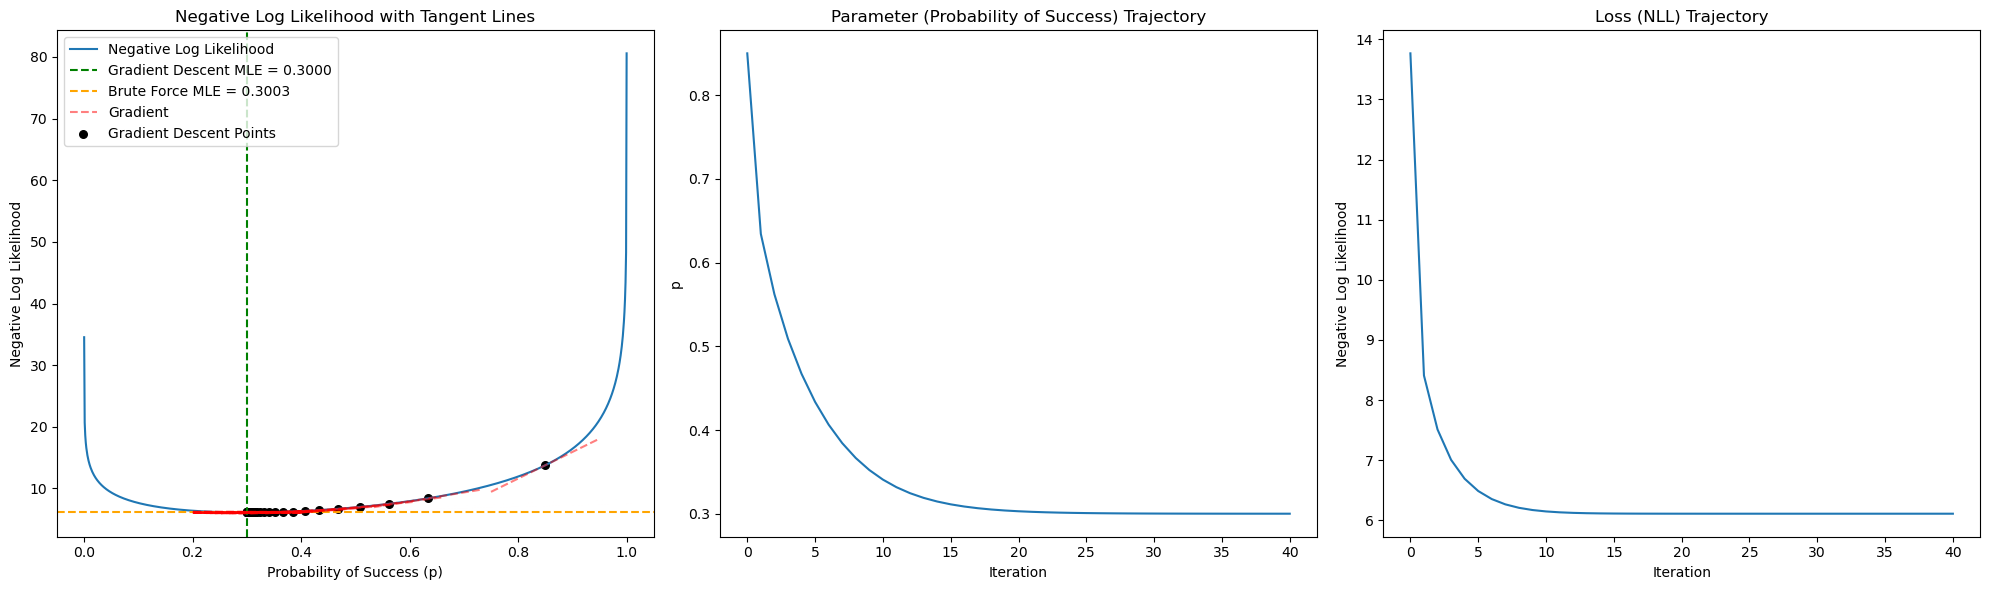

In [383]:
def binomial_nll_scalar(n: int, k: int, p: float) -> float:
    '''
    Negative log likelihood function for the binomial

    PARAMS:
        - n: Total trials
        - k: Number of successes in n trials
        - p: Unknown probability of success (we are inferring this)
    
    RETURNS:
        - The negative log likelihood of a binomial likelihood function for a given probability of success
    '''

    if p <= 0 or p >= 1:
        return np.inf  # prevent log(0) or log of negative
    return -((k * np.log(p)) + ((n - k) * np.log(1 - p)))

# Define the 
def binomial_nll_grad(n, k, p):
    '''
    Gradient of the NLL function for the binomial with respect to p, the parameter we are optimizing

    PARAMS:
        - n: Total trials
        - k: Number of successes in n trials
        - p: Unknown probability of success (we are inferring this)

    RETURNS:
        - The gradient of the binomial likelihood function's negative log likelihood for a given probability of success
    '''

    if p <= 0 or p >= 1:
        return 0  # prevent invalid gradients outside (0,1)
    return -((k / p) - ((n - k) / (1 - p)))

# Gradient descent implementation
def gradient_descent_binomial_mle(n, k, lr=0.005, steps=40, p_init=0.85):
    '''
    Implement gradient descent for Binomial negative log likelihood function

    PARAMS:
        - n: Total trials
        - k: Number of successes in n trials
        - lr: The learning rate that determines step size
        - steps: The number of steps we take in order to find the local minimum of the function
        - p_init: An initialized p-value (could be random)
    
    RETURNS:
        -
    '''
    p = p_init
    history = [p]
    for _ in range(steps):
        grad = binomial_nll_grad(n, k, p)
        p -= lr * grad
        # Project p back into (0,1) to keep it valid
        p = min(max(p, 1e-5), 1 - 1e-5)
        history.append(p)
    return p, history


#Start plotting gradient descent path (binomial nll curve from previous two charts)
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.plot(params, nll_binomial, label='Negative Log Likelihood')

#Gradient descent
p_mle_gd, p_history = gradient_descent_binomial_mle(n, k)

#Calculate NLL for gradient descent points
gd_nll_values = [binomial_nll_scalar(n, k, p) for p in p_history]

#Plot MLE lines from both gradient descent and brute force methods (comparison)
plt.axvline(p_mle_gd, color='green', linestyle='--', label=f'Gradient Descent MLE = {p_mle_gd:.4f}')
plt.axhline(min(nll_binomial), color='orange', linestyle='--', label=f'Brute Force MLE = {params[np.argmin(nll_binomial)]:.4f}')

#Plot tangent lines at each scatter point; this shows how the point moves against the slope of its tangent line
for i in range(1, len(p_history)):
    x0 = p_history[i-1]
    y0 = binomial_nll_scalar(n, k, x0)
    
    #Calculate gradient at this point
    grad = binomial_nll_grad(n, k, x0)
    
    #Plot tangent lines - only add a label for the first line
    x_tangent = np.linspace(x0 - 0.1, x0 + 0.1, 100)
    y_tangent = y0 + grad * (x_tangent - x0)
    if i == 1:
        plt.plot(x_tangent, y_tangent, color='red', alpha=0.5, linestyle='--', label='Gradient')
    else:
        plt.plot(x_tangent, y_tangent, color='red', alpha=0.5, linestyle='--')

# Scatter plot of gradient descent points
plt.scatter(p_history, gd_nll_values, color='black', s=30, label='Gradient Descent Points')

plt.title("Negative Log Likelihood with Tangent Lines")
plt.xlabel("Probability of Success (p)")
plt.ylabel("Negative Log Likelihood")
plt.legend()
plt.tight_layout()

#Parameter Trajectory
plt.subplot(132)
plt.plot(p_history)
plt.title('Parameter (Probability of Success) Trajectory')
plt.xlabel('Iteration')
plt.ylabel('p')

#Plot NLL Trajectory
plt.subplot(133)
plt.plot(gd_nll_values)
plt.title('Loss (NLL) Trajectory')
plt.xlabel('Iteration')
plt.ylabel('Negative Log Likelihood')

plt.tight_layout()
plt.show()

### Building Confidence Intervals with MLE

- I'm not going to get into the details of building confidence intervals with a closed-form mathematical solution. Closed-form solutions, in this case, are distribution-specific, meaning each distribution has its own. Since we have computers that can simulate distributions and sample from them thousands of times in less than a second, I think it's less important to memorize the formula for each special case and more important to understand the more flexible solution that will work with ANY distribution.
- This silver bullet solution is called **Parametric Bootstrapping**
    - **Parametric Bootstrapping (or Parametric Bootstrap Sampling)** is a sampling method in which we samply synthetic data from a fitted distribution in order to estimate the distribution of its parameters
        - Below is an inefficient way to program this, but displays how MLE is used in bootstrap sampling from code we've already written.
    - I also want to note there is a difference between **Parametric Bootstrapping** in which we draw from the estimated Binomial distribution and **Nonparametric Bootstrapping** in which we resample the original data points with replacement if we had the individual trials (vector of 0s/1s)

/var/folders/nz/ht8s09bd1knct30kv0qm6c040000gn/T/ipykernel_40253/2382369434.py:14: RuntimeWarning: divide by zero encountered in log
  return np.array([-((k*np.log(p)) + ((n-k)*np.log(1-p))) for p in params])


Bootstrap 95% CI for p: [0.001, 0.600]


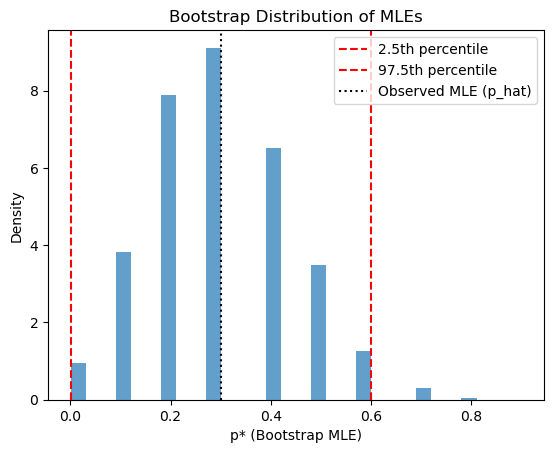

In [387]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data and possible parameters 
n = 10
k = 3
params = np.linspace(0.001, 1, 1000)

# Number of bootstrap replications
B = 1000

# Store the bootstrap estimates
bootstrap_estimates = []


for _ in range(B):
    #Simulate "bootstrap" data from Binomial(n, p_hat)
    simulated_k = np.random.binomial(n, p_mle_gd) #Using p_mle_gd from gradient descent

    #Fit MLE on simulated dataset
        # For Bernoulli/Binomial, the MLE could also computed much more efficiently as follows: simulated_k / n
    #Compute NLL with binomial likelihood 
    nll_binomial = binomial_nll(n, simulated_k, params)

    #Plot Brute Force method
    p_bootstrap = params[np.argmin(nll_binomial)]
    bootstrap_estimates.append(p_bootstrap)

bootstrap_estimates = np.array(bootstrap_estimates)

# Set confidence level
conf = 0.95
tails = (1-conf)/2
lower_bound_freq = tails
upper_bound_freq = 1-tails

# Sort them or use np.percentile directly
lower_95 = np.percentile(bootstrap_estimates, 100*lower_bound_freq)
upper_95 = np.percentile(bootstrap_estimates, 100*upper_bound_freq)

print(f"Bootstrap 95% CI for p: [{lower_95:.3f}, {upper_95:.3f}]")

# Optional: visualize the distribution of bootstrap MLEs
plt.hist(bootstrap_estimates, bins=30, density=True, alpha=0.7)
plt.axvline(x=lower_95, color='red', linestyle='--', label=f'{round(100*lower_bound_freq, 2)}th percentile')
plt.axvline(x=upper_95, color='red', linestyle='--', label=f'{round(100*upper_bound_freq, 2)}th percentile')
plt.axvline(x=p_mle_gd, color='black', linestyle=':', label='Observed MLE (p_hat)')
plt.title("Bootstrap Distribution of MLEs")
plt.xlabel("p* (Bootstrap MLE)")
plt.ylabel("Density")
plt.legend()
plt.show()


- Let's quickly compare our credible/confidence intervals given Bayesian and Frequentist approaches so far

In [277]:
print(f"Our Bayesian Method Yielded a {100*round(cred_pct, 2)}% credible interval of [{round(lower_bound_bayes,3)}, {round(upper_bound_bayes,3)}]")
print(f"Our Frequentist Method Yielded a {100*round(cred_pct, 2)}% confidence interval of [{round(lower_95,3)}, {round(upper_95,3)}]")
print("Ultimately, neither can tell us whether our coin is fair with a high degree of confidence because we simply don't have enough data.")

Our Bayesian Method Yielded a 95.0% credible interval of [0.139, 0.614]
Our Frequentist Method Yielded a 95.0% confidence interval of [0.001, 0.6]
Ultimately, neither can tell us whether our coin is fair with a high degree of confidence because we simply don't have enough data.


# Hypothesis Testing

- Let's discuss one final method for identifying whether or not our coin is fair: **Hypothesis testing**
- **Hypothesis testing** is a Frequentist technique to determine, through testing, whether a hypothesis is true or not. It is CRITICAL to know as a data scientist, because it is the foundation of experimentation (specifically A/B testing), which I promise is something you will have to know how to do.

</br>

- The overall flow for a hypothesis test is as follows (note: when applying these at your job, you should also do things like understand constraints around randomization and sampling, but this is all just for the purpose of showing you how to properly run a test):
    - Break down problem statement and select statistical model
    - Establish null and alternative hypotheses
    - Select significance level (alpha) and statistical power (beta)
    - Calculate the sample size necessary for you to hit the significance level and statistical power
        - For Z-Tests and T-Tests, you need minimum detectible effect (MDE) and variance
        - For ANOVA, instead of MDE, you need assumptions about between-group variance
        - For Chi-square, instead of MDE, you need expected frequencies
        - For Binomial, your need a baseline conversion rate and MDE
    - Run the experiment
    - Interpret Results
- The next section is dedicated to breaking each of these steps down.

</br>

### Break Down Problem Statement and Select Statistical Model
- Our problem statement is simple: determine whether or not our coin is fair
    - Basically, we want to compare our coin's success rate against a fair coin's known success rate (0.5)
- Selecting the underlying statistical model we'll use for our test is where things can get tricky, and frankly, a bit overwhelming.
- There are TONS of statistical models to choose from, each for nuanced use-cases.
- But here's the deal, we don't care about the long tail. We want to learn the 20% of models that cover 80% of real world scenarios. We aren't trying to get a PhD here, we're trying to learn practical statistics.
- Below I'll highlight the few models that actually cover most use cases:
    - **Z-Tests:** Use when two groups' means OR proportions need to be compared, or when the difference between two means need to be compared
    - **T-Test:** Use when two groups' means need to be compared, but you don't have very much data (n<30)
    - **Binomial Test:** Use when a single proportion is equal to a specific value (relatively niche)
    - **ANOVA:** Use to compare means across 3 or more independent groups (if you are going to do this, consider a multi-armed bandit test instead of an A/B/n test with ANOVA)
    - **Chi-square Test:** Use to test whether two categorical variables are independent
- These 5 models should cover the vast majority of testing you'd run into in the wild, but you know what? In my time as a data scientist, I've basically only used two of these models for A/B testing (granted, I had plenty of data to work with). 
    - **Z-Tests and T-Tests** will cover almost any business use-case that your stakeholders care about.
        - Running two components on-site and want to compare CTRs? Z-Test
        - Running two ad campaigns and want to compare which is driving higher average revenue? Z-Test/T-Test
        - Testing a recommendation algorithm and want to compare average watch time or spend against the control? Z-Test/T-Test
        - Released a new feature and want to see how it impacts time spent? Z-Test/T-Test (paired)
    - Traditional business use-cases aren't all that creative, and luckily that means a lot of them can boil down to using a Z-Test/T-Test
- That said, we could use a Binomial Test or Z-Test for our use-case. Technically the Z-Test in this case will be an approximation and the Binomial test will be exact, but the Z-Test is much more broadly applicable and most business use-cases won't need the precision offered from the Binomial test. Additionally, this exact vs approximate differentiation becomes negligible as the sample size grows, so a Z-Test in most cases should be totally fine.
- One last quick note before we move on - Z-Tests, T-Tests, and Binomial Tests are all very similar as they are represented by normal distributions... practically, here's what's important:
    - When comparing proportions: Use a Z-Test if you have enough data (n > 30), if not then use a Binomial Test
    - When comparing means: Use a Z-Test if you have enough data (n > 30) AND know the population variance, if not then use a T-Test as the distribution's fatter tails account for more uncertainty.

</br>

### Establish null and alternative hypotheses
- In Hypothesis testing you always start with a null and alternative hypothesis. In this case:
    - Null Hypothesis (H0): p = 0.5 --> Represents our base case or control. Most coins are fair and there's no reason for us to believe that this coin is different from any standard coin; therefore, we hypothesize it is fair
    - Alternative Hypothesis (Ha): p != 0.5 --> Represents our test case or experiment. This coin may not be fair, but we don't know so we want to find out.
        - This Ha is presented for a two-tailed test.
        - If we wanted to present it for a one-tailed test, we could use either of the following:
            - p > 0.5 (coin is biased toward heads)
            - p < 0.5 (coin is biased toward tails)
- You're probably wondering what one- and two-tailed tests are, so let me break that down real quick.
    - A **One-Tailed Test** is used when you have a directional hypothesis that predicts that one group has a higher (right) or lower (left) parameter than the other. In this case, the critical region used to determine statistical significance and defined by the significance level in only in one-tail of the distribution.
    - A **Two Tailed Test** is used when you have a non-directional hypothesis that just predicts that one group is different (higher or lower) than the other. In this case, the critical region used to determine statistical significance and defined by the significance level is split between both tails of the distribution.
- Below shows an example of the critical values, which are set based on the significance level, look like in two-tailed, right-tailed, and left-tailed tests.
    - The **significance Level** is a threshold for which a p-value of an observed effect is considered statistically significant; this threshold represents the decision boundary that determines whether or not we find the data significant enough to reject the H0 and accept Ha
    - The **p-value** is the probability that the outcome you observed is due to random chance ASSUMING H0 is true; it inversely quantifies our confidence in the treatment being different than the control - the lower it is, the more confident we can feel.
        - The p-value can be interpretted as the proportion of the time you would see a false positive (Type I Error) under the assumption there really is no difference between the control and treatment (H0).
            - **False positives (Type I Errors)** occur when the samples you draw from two groups imply the two groups belong to different distributions when, in fact, they belong to the same distribution
        - That said, we typically want this proportion to be low to consider our analysis strong enough to reject the null hypothesis, which is what our significance level represents
            - In the example below, we select a significance level of 0.05, meaning that we would only reject the hypothesis if the probability of a False positive, under the assumption that the null hypothesis is actually true, is under 5%.


Z-test Critical Values:
  Two-tailed: ±1.9600
  Right-tailed: 1.6449
  Left-tailed: -1.6449


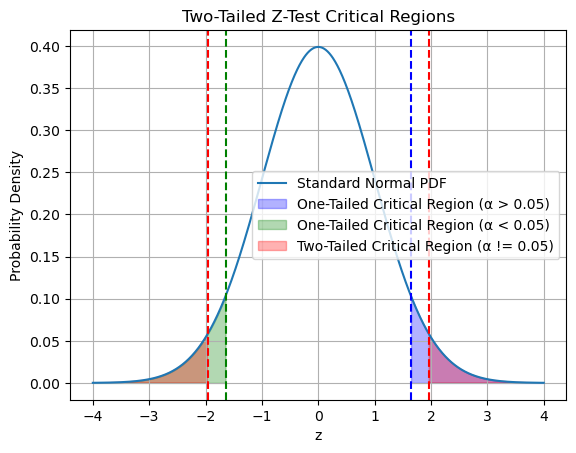

In [278]:
from scipy.stats import norm

# Significance level
alpha = 0.05

# 1. Z-test critical values (standard normal)
z_critical_two_tailed = norm.ppf(1 - alpha / 2)  # two-tailed
z_critical_right_tail = norm.ppf(1 - alpha)      # right-tailed
z_critical_left_tail = norm.ppf(alpha)           # left-tailed

print("Z-test Critical Values:")
print(f"  Two-tailed: ±{z_critical_two_tailed:.4f}")
print(f"  Right-tailed: {z_critical_right_tail:.4f}")
print(f"  Left-tailed: {z_critical_left_tail:.4f}")


# Z-distribution curve
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Plot the curve
plt.plot(x, y, label='Standard Normal PDF')
plt.fill_between(x, y, where=(x >= z_critical_right_tail), 
                 color='blue', alpha=0.3, label='One-Tailed Critical Region (α > 0.05)')
plt.fill_between(x, y, where=(x <= z_critical_left_tail), 
                 color='green', alpha=0.3, label='One-Tailed Critical Region (α < 0.05)')
plt.fill_between(x, y, where=(x <= -z_critical_two_tailed) | (x >= z_critical_two_tailed), 
                 color='red', alpha=0.3, label='Two-Tailed Critical Region (α != 0.05)')
plt.axvline(-z_critical_two_tailed, color='red', linestyle='--')
plt.axvline(z_critical_two_tailed, color='red', linestyle='--')
plt.axvline(z_critical_right_tail, color='blue', linestyle='--')
plt.axvline(z_critical_left_tail, color='green', linestyle='--')
plt.title("Two-Tailed Z-Test Critical Regions")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


- So what's the deal with critical z-values? What are they anyways?
    - Okay I'm gonna review some really basic stats very quickly right here
- The critical z-values are actually z-scores. What's a z-score you ask? Let's set the scene with standard deviation.
    - **Standard deviation** is a measure of spread or variance around the mean of a distribution. Said another way, describes how spread out the values in a dataset are and it applies to any distribution.
        - That said, standard deviation is particularly useful in normal distributions because we know that
            - 68% of the data in a normal distribution falls within 1 standard deviation from the mean
            - 95% of the data in a normal distribution falls within 2 standard deviations from the mean
            - 99.7% of the data in a normal distribution falls within 3 standard deviations from the mean
        - This is incredibly useful, but suffers from one draw back. You can't draw comparisons across distributions.
            - Here's a great example I picked up from the book Essential Math for Data Science
                - Let's say we have 2 homes from neighborhoods A and B
                    - Neighborhood A: mean = $140k, standard deviation = 3k
                    - Neighborhood b: mean = $800k, standard deviation = 10k
                    - Home A = $150k and Home B = $815k
                    - Which home is more expensive relative to the average home in its neighborhood?
                        - You simply can't answer this with standard deviations! How do we deal with it then? z-scores.
    - It is common to rescale a normal distribution such that the mean is 0 and standard deviation is 1, this is called the **standard normal distribution**. The standard normal distribution makes it easy to compare the spread of one normal distribution to another because it expresses all x-values in terms of standard deviations, called **z-scores**. Effectively, we can normalize 2 normal distributions such that their spreads are comparable with z-scores.
        - Turning an x-value into a z-score uses a basic scaling formula: 
            - Population: $z = \frac{x - \mu}{\sigma}$, where $\mu$ is the population mean and ${\sigma}$ is the population standard deviation
            - Sample: $z = \frac{x - \bar{x}}{s}$, where $\bar{x}$ is the sample mean and ${s}$ is the sample standard deviation
    - In our toy example above
        - Home A: $z = \frac{150-140}{3} = 3.3$
        - Home B: $z = \frac{815-800}{10} = 1.5$
        - This means the answer is Home A

</br>

- Okay, now that we understand z-scores, we can move on to answering the original question: why are we using critical z-values?
    - We want a way to consistently set standard p-values (significance levels) across many experiments that may have different means and standard deviations, so in order to do this we need to standardize our distribution back to a standard normal distribution so that we're able to compare the values across experiments. It's really a convenience thing so that these types of tests can be standardized. Could we use standard deviation instead of z-score? Sure! But then we'd have to recalculate the appropriate standard deviation everytime we want p=0.05 instead of just knowing the z-score is 1.96 for two-tailed tests or 1.6449 for one-tailed tests, which would be annoying overhead to deal with.
    - When we compute a test statistic and convert it to a z-score, this is what's happening: $z = \frac{\text{sample statistic }-\text{null hypothesis value}}{\text{standard error}}$

### Select significance level ($\alpha$) and statistical power ($\beta$)
- Now that we have our hypotheses and understand the different tests, we need to select a significance level and statistical power.
    - **Significance Level:** A threshold for which a p-value of an observed effect is considered statistically significant; this threshold represents the decision boundary that determines whether or not we find the data significant enough to reject the H0 and accept Ha
        - The **p-value** is the probability that the outcome you observed is due to random chance ASSUMING H0 is true; it inversely quantifies our confidence in the treatment being different than the control - the lower it is, the more confident we can feel.
            - Common p-values to select a significance level for are:
                - 0.1
                - 0.05 (most popular)
                - 0.01
    - **Statistical power** is the probability that the test will correctly reject H0 assuming that Ha is true; the probbaility of detecting an effect when one truly exists.
        - In other words, it quantifies a test's sensitivity to identifying an effect assuming Ha is true and is calculated as 1-$\beta$ where $\beta$ is the probability of a Type II Error (false negative)
        - You can also think of power in terms of probability notation: Power = P(Reject Ho | Ha is true)
        - Common power levels are:
            - 0.8
            - 0.9
            - 0.95
- For our test, let's select 0.05 and 0.8, a pretty standard combination.
    - Both of these have corresponding critical z-values
        - $\alpha:$ = 0.05 -> 1.96
        - $\beta:$ = 0.8 -> 0.84

In [279]:
#Compute alpha and beta critical values
alpha = 0.05
beta = 0.8

#two tailed (divide by 2)
alpha_z_crit = norm.ppf(1-alpha/2)
print(alpha_z_crit)

beta_z_crit = norm.ppf(beta)
print(beta_z_crit)

1.959963984540054
0.8416212335729143


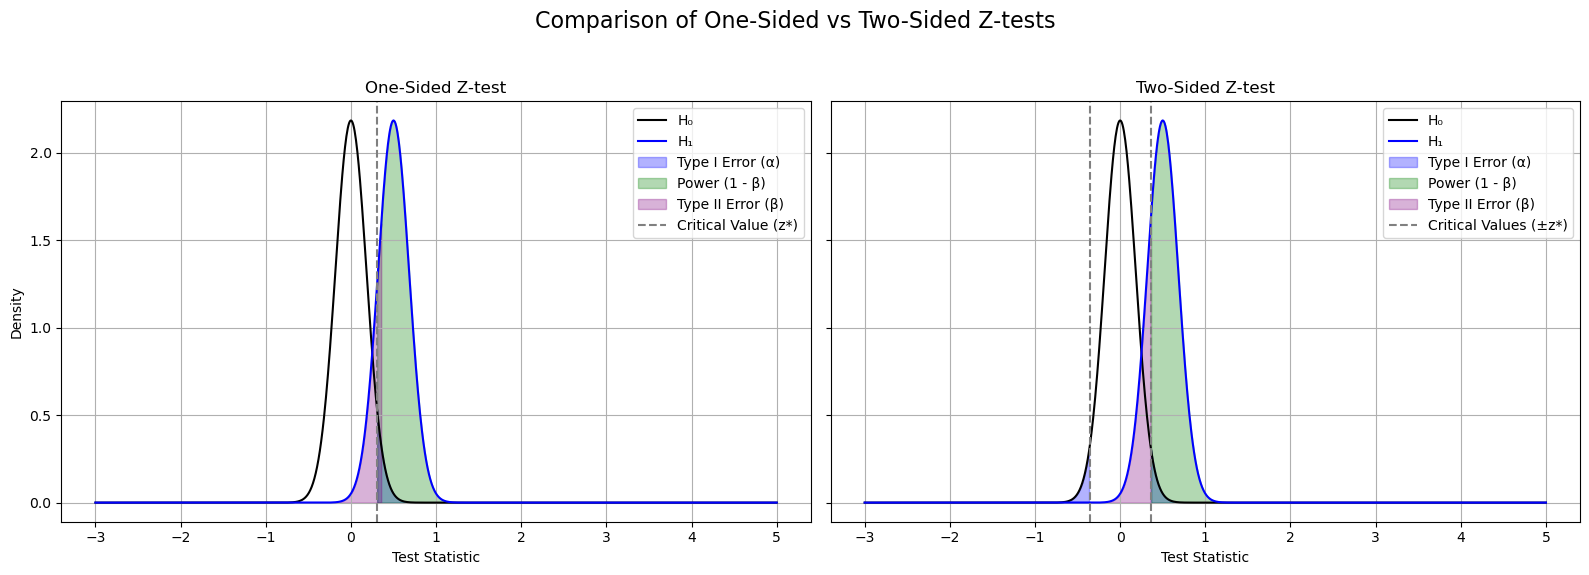

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for z-test
alpha = 0.05  # significance level
effect_size = 0.5  # standardized effect size (Cohen's d)
mu_0 = 0        # mean under H0
mu_1 = mu_0 + effect_size  # mean under H1
sigma = 1       # standard deviation
n = 30          # sample size
se = sigma / np.sqrt(n)  # standard error

#Critical z-value for one-sided test
z_crit = norm.ppf(1 - alpha)

#x values for plotting
x = np.linspace(-3, 5, 1000)

#Null and alternative distributions
null_dist = norm(mu_0, se)
alt_dist = norm(mu_1, se)

#PDF values
null_pdf = null_dist.pdf(x)
alt_pdf = alt_dist.pdf(x)

#Calculate power
z_beta = (z_crit * se - effect_size * se) / se
power = 1 - norm.cdf(z_beta)


#Shade alpha, power, and beta (Type II Error) regions (one tail)
x_alpha = x[x > z_crit * se]
x_power = x[x > z_crit * se]
x_beta = x[x <= z_crit * se]


#Two-tailed Test
#Parameters for two-sided z-test remain the same except alpha is split into two tails
alpha_two_sided = 0.05
z_crit_low = norm.ppf(alpha_two_sided / 2)
z_crit_high = norm.ppf(1 - alpha_two_sided / 2)

# Compute critical values in terms of the test statistic
crit_low = z_crit_low * se
crit_high = z_crit_high * se

# Calculate power for two-sided test
beta_region = (alt_dist.cdf(crit_high) - alt_dist.cdf(crit_low))
power_two_sided = 1 - beta_region

# Shade alpha regions, power regions and beta region (two tails)
x_alpha_low = x[x < crit_low]
x_alpha_high = x[x > crit_high]
x_power_low = x[x < crit_low]
x_power_high = x[x > crit_high]
x_beta = x[(x >= crit_low) & (x <= crit_high)]


# Set up side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- ONE-SIDED TEST ---
axs[0].plot(x, null_pdf, label='H₀', color='black')
axs[0].plot(x, alt_pdf, label='H₁', color='blue')

# One-sided: alpha and power shading
axs[0].fill_between(x_alpha, 0, null_dist.pdf(x_alpha), color='blue', alpha=0.3, label='Type I Error (α)')
axs[0].fill_between(x_power, 0, alt_dist.pdf(x_power), color='green', alpha=0.3, label='Power (1 - β)')
axs[0].fill_between(x_beta, 0, alt_dist.pdf(x_beta), color='purple', alpha=0.3, label='Type II Error (β)')

# Critical value line
axs[0].axvline(z_crit * se, color='gray', linestyle='--', label='Critical Value (z*)')

# Labels
axs[0].set_title("One-Sided Z-test")
axs[0].set_xlabel("Test Statistic")
axs[0].set_ylabel("Density")
axs[0].legend()
axs[0].grid(True)

# --- TWO-SIDED TEST ---
axs[1].plot(x, null_pdf, label='H₀', color='black')
axs[1].plot(x, alt_pdf, label='H₁', color='blue')

# Two-sided: alpha, power, beta shading
axs[1].fill_between(x_alpha_low, 0, null_dist.pdf(x_alpha_low), color='blue', alpha=0.3)
axs[1].fill_between(x_alpha_high, 0, null_dist.pdf(x_alpha_high), color='blue', alpha=0.3, label='Type I Error (α)')
axs[1].fill_between(x_power_low, 0, alt_dist.pdf(x_power_low), color='green', alpha=0.3)
axs[1].fill_between(x_power_high, 0, alt_dist.pdf(x_power_high), color='green', alpha=0.3, label='Power (1 - β)')
axs[1].fill_between(x_beta, 0, alt_dist.pdf(x_beta), color='purple', alpha=0.3, label='Type II Error (β)')

# Critical lines
axs[1].axvline(crit_low, color='gray', linestyle='--', label='Critical Values (±z*)')
axs[1].axvline(crit_high, color='gray', linestyle='--')

# Labels
axs[1].set_title("Two-Sided Z-test")
axs[1].set_xlabel("Test Statistic")
axs[1].legend()
axs[1].grid(True)

plt.suptitle("Comparison of One-Sided vs Two-Sided Z-tests", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### Calculate the sample size necessary for you to hit the significance level and statistical power
- For a z-test, we still need one last element before we can compute our sample size: **Effect size ($\Delta$)**
    - Effect size is often first described with a **minimum detectible effect (MDE)** 
        - Let's say we only want to determine a coin unfair if it's true probability of success is a relative 10% higher/lower than a fair coin's probability of success
            - A fair coin's probability of success is 0.5, so the MDE we're looking for 0.55
                - MDE = $\frac{\theta_2 - \theta_1}{\theta_1}$ = $\frac{0.55 - 0.5}{0.5}$ = 0.1
    - We can derive effect size from the following equation: *$\Delta^2 = (\theta_2 - \theta_1)^2$*... if you're wonding why we don't care about an MDE of 0.45 (10% lower), it's because squaring this value ends up accounting for both scenarios, so we really only need to compute one
        - In this case, $\Delta^2 = (\theta_2 - \theta_1)^2 = (0.55-0.5)^2 = 0.0025$

- Great! Now we're finally ready to compute our sample size.
    - For this, we use the following formula: 

$n = \frac{(z_{1 - \alpha / 2} + z_{1 - \beta})^2 \cdot \sigma^2}{\delta^2}$

- Where,
    - $z_{1 - \alpha / 2}$ -> The z-critical value of the two-tailed significance level we selected
    - $z_{1 - \beta}$ -> The z-critical value of the statistical power we selected
    - $\sigma$ -> The variance
    - $\delta$ -> The effect size we selected
- We still haven't covered, variance, however. Unfortunately, variance is the least straightforward of these to estimate. It actually can get so messy, that I honestly don't think it's worth going over the intricacies of how to estimate it under different conditions. Instead, I'll just give you the different sample size formulas for each condition. PLEASE NOTE: This is not actually how you calculate variance, it is only how you calculate variance in the context of estimating a sample size - this is because the actual variance computations require sample size, but we're using some algebraic magic to rearrange terms and solve for n with the equation: $n = \frac{(z_{1 - \alpha / 2} + z_{1 - \beta})^2 \cdot \sigma^2}{\delta^2}$
    - **One-sample test:** Comparing a sample to a known or hypothesized value (Is the coin fair (compare sample proportion to 0.5)? Is the average weight 160lbs (compare sample mean to 160?)
        - Mean: $s^2 = \frac{1}{\,n - 1\,}\sum_{i=1}^n (x_i - \bar{x})^2$
        - Proportion: $\sigma^2 = p_0(1 - p_0)$
            - The variance is estimated under the null hypothesis $p_0$ because we assume the null is true
    - **Two-sample test:** Comparing two independent groups to each other (Does the new button yield a higher click-through-rate (CTR) than the old button? Do users in group A spend more time than users in group B)... keep in mind the result of this will be the n for a single group
        - Mean: $s^2 pooled = 2 * s_0^2$, where we don't know $s_1$, so we must assume it is equal to $s_0$
        - Proportion: $\sigma^2 pooled = 2 * p_0(1 - p_0)$, where we don't know $p_1$, so we must assume it is equal to $p_0$
- Our test is a one-sample test because we know the population proportion that we want to compare our sample proportion against, so let's compute a sample size

In [281]:
def compute_n_one_sample_proportion_(z_alpha, z_beta, sigma, delta):
    return round(((z_alpha+z_beta)**2 * sigma)/(delta**2))

#Compute delta - our MDE is 10%
pop_proportion = 0.5
desired_sample_prop = 0.55
delta = (0.55-0.5)

#Compute variance specifically for computing n - remember, this is not how to compute actual variance
    #NOTE: I am not exponentiating sigma because the variance is defined as sigma**2, I would need the standard deviation (mean) or standard error (proportion)
sigma = pop_proportion*(1-pop_proportion)

n = compute_n_one_sample_proportion_(alpha_z_crit, beta_z_crit, sigma, delta)
print(f'We need {round(n)} samples in order to determine whether we should reject the null hypothesis with an significance level of {alpha} and power of {beta}')

We need 785 samples in order to determine whether we should reject the null hypothesis with an significance level of 0.05 and power of 0.8


### Run the Experiment

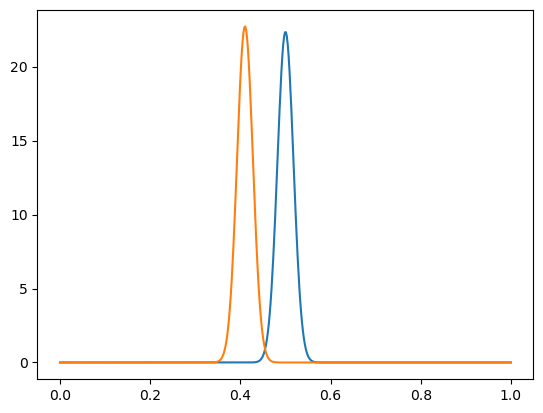

In [282]:
from scipy.stats import binom_test, norm
import numpy as np

# === Scenario: Flip a coin 100 times, get 60 heads ===
observed_heads = round(n*0.41)
p_null = 0.5  # Null hypothesis: fair coin
p_hat = observed_heads/n

# Standard errors under the null and observed
se_null = np.sqrt(p_null * (1 - p_null) / n)
se_observed = np.sqrt(p_hat * (1 - p_hat) / n)

# Null and alternative distributions
null_dist = norm(p_null, se_null)
alt_dist = norm(p_hat, se_observed)
x = np.linspace(0,1,500)
# PDF values
null_pdf = null_dist.pdf(x)
alt_pdf = alt_dist.pdf(x)

plt.plot(x, null_pdf)
plt.plot(x, alt_pdf)


In [283]:
from math import sqrt

lower_approx = p_hat - alpha_z_crit * se_observed
upper_approx = p_hat + alpha_z_crit * se_observed
print(f"Approx. 95% CI = [{lower_approx:.3f}, {upper_approx:.3f}]")


Approx. 95% CI = [0.376, 0.445]


95.0% credible interval: [0.375, 0.444]
We can be 95.0% certain that the true underlying probability of success, given our prior and observed data, lies between these probabilities [0.375, 0.444]
So can we be sure that our coin is fair? No, we don't have enough evidence/data yet.


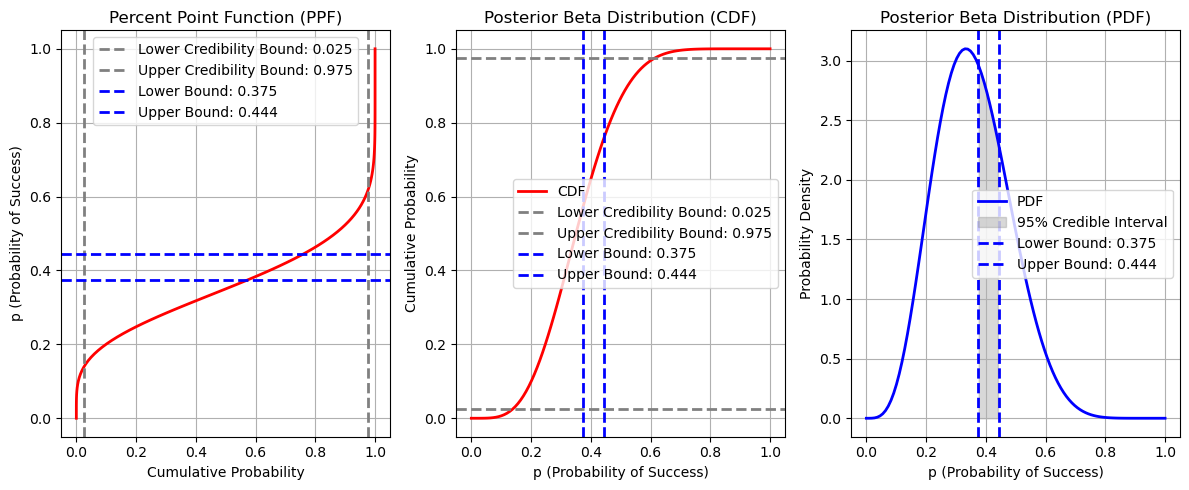

In [285]:
from scipy.stats import beta

alpha_final = observed_heads + alpha_updated
beta_final = (round(n) - observed_heads) + beta_updated

lower_cred_bound = 0.025
upper_cred_bound = 0.975
cred_pct = upper_cred_bound-lower_cred_bound

lower_bound_bayes = beta.ppf(lower_cred_bound, alpha_final, beta_final)
upper_bound_bayes = beta.ppf(upper_cred_bound, alpha_final, beta_final)
print(f"{100*round(cred_pct, 2)}% credible interval: [{lower_bound_bayes:.3f}, {upper_bound_bayes:.3f}]")
print(f"We can be {100*round(cred_pct, 2)}% certain that the true underlying probability of success, given our prior and observed data, lies between these probabilities [{lower_bound_bayes:.3f}, {upper_bound_bayes:.3f}]")
print("So can we be sure that our coin is fair? No, we don't have enough evidence/data yet.")


fig, axes = plt.subplots(1, 3, figsize=(12, 5))

#Plot PPF on left subplot
axes[0].plot(cdf_values, p_hat_cont, color='red', lw=2)
#Draw horizontal dashed lines at the credible interval bounds and display intersecting x values 
axes[0].axvline(lower_cred_bound, color='grey', linestyle='--', lw=2, label=f'Lower Credibility Bound: {lower_cred_bound:.3f}')
axes[0].axvline(upper_cred_bound, color='grey', linestyle='--', lw=2, label=f'Upper Credibility Bound: {upper_cred_bound:.3f}')
axes[0].axhline(lower_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Lower Bound: {lower_bound_bayes:.3f}')
axes[0].axhline(upper_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Upper Bound: {upper_bound_bayes:.3f}')
axes[0].set_xlabel("Cumulative Probability")
axes[0].set_ylabel("p (Probability of Success)")
axes[0].set_title("Percent Point Function (PPF)")
axes[0].grid(True)
axes[0].legend()


#Plot CDF on middle subplot
axes[1].plot(p_hat_cont, cdf_values, color='red', lw=2, label="CDF")
#Draw vertical dashed lines at the credible interval bounds and display intersecting x values 
axes[1].axhline(lower_cred_bound, color='grey', linestyle='--', lw=2, label=f'Lower Credibility Bound: {lower_cred_bound:.3f}')
axes[1].axhline(upper_cred_bound, color='grey', linestyle='--', lw=2, label=f'Upper Credibility Bound: {upper_cred_bound:.3f}')
axes[1].axvline(lower_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Lower Bound: {lower_bound_bayes:.3f}')
axes[1].axvline(upper_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Upper Bound: {upper_bound_bayes:.3f}')
axes[1].set_xlabel("p (Probability of Success)")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Posterior Beta Distribution (CDF)")
axes[1].grid(True)
axes[1].legend()

#Plot PDF on right subplot
axes[2].plot(p_hat_cont, beta_dist_posterior, color='blue', lw=2, label="PDF")
#Shade area in credible interval
axes[2].fill_between(p_hat_cont, beta_dist_posterior, 
                    where=(p_hat_cont >= lower_bound_bayes) & (p_hat_cont <= upper_bound_bayes),
                    color='grey', alpha=0.3, label="95% Credible Interval")
#Plot corresponding lower and upper bounds that encapsulate the 95% credible interval                     
axes[2].axvline(lower_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Lower Bound: {lower_bound_bayes:.3f}')
axes[2].axvline(upper_bound_bayes, color='blue', linestyle='--', lw=2, label=f'Upper Bound: {upper_bound_bayes:.3f}')                
axes[2].set_xlabel("p (Probability of Success)")
axes[2].set_ylabel("Probability Density")
axes[2].set_title("Posterior Beta Distribution (PDF)")
axes[2].grid(True)
axes[2].legend()


plt.tight_layout()
plt.show()

#Comparison against Frequentist Methods

#OUTLINE

#Scenario setup
    #We know there are 10 observations (n) with 3 successes (k)
    #Remember, the goal is to determine whether or not out particular coin is fair, and we know that a fair coin has p(k) = 0.5

#Parameter Estimation (MLE & Confidence Intervals)
    #MLE: Simply estimator p_hat = k/n
        #wtf is this??
    #Computing a frequentist confidence interval from the MLE

#Hypothesis Testing
    #Formulate hypotheses
        #Null: H0: p = 0.5
        #Alternative: Ha: p != 0.5 (two-tailed)
        #Alternative: Ha: p < 0.5 (one-tailed)
    #Compute sample sizes with power and significance levels
    #Run test and compute p-value
    #Evaluate results - compare p-value against significance level to decide whether or not to reject H0
    #Extend Bayesian test for side-by-side comparison?
        #Update Beta prior to posterior
        #Outline how you might compute the posterior probability that p lies in a region "close" to 0.5, or even calculate a Bayes Factor comparing H0 with H1?

#Interpretation and Comparison
    #Highlight different interpretations
        #Frequentist: p-values tell you long-run probabbility of observing your data (or more/less extreme assuming H0 is true)
        #Bayesian: The posterior gives you a direct probability statement about p, and the Bayes Factor compares how well each hypothesis is supported
    #Briefly discuss how the approaches can inform decision in an industrial setting, for instance, determining whether a new A/B test result is significant enough to act upon
        #Consider implementing an extremely abbreviated version of Bayesian and Frequentist methods for a business example to highlight
            #Maybe 2 business examples: one probability/rate and one continuous value count (like weights or something)
                #Consider using real datasets

In [ ]:
#TODO

# THIS WORKS FOR A CONTINUOUS EXAMPLE (LIKE WEIGHTS), BUT NOT DISCRETE (LIKE COIN FLIPS)... CONSIDER TO CREATING A NEW EXAMPLE FOR CONTINUOUS

**Normal Distribution PDF:**  $f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

- So far we used our prior knowledge of coins to estimate a prior, then observed 10 trials (n) with 3 successes (k), and using the observed data were able to update our beliefs about this particular coin given those observations.
    - This is the Bayesian approach to estimating the true underlying success rate of a parameter distribution in order to determine whether our coin is fair.

<br>

- Now let's take an alternative approach to estimating the true underlying success rate in order to determine whether our coin is fair - the Frequentist approach.
    - When most people think of statistics, they think of Frequentism. Not because it's better than Bayesian statistics, in fact many would argue the opposite, but because it's traditionally what's taught in school.
    - Frequentism is the understanding of statistics and probability through the lens of how frequently an event occurs, as opposed to what we believe prior to observing data and updating that belief given data, which describes Bayesian statistics.

<br>

- One critically important Frequentist method to estimate a distribution given data is called Maximum Likelihood Estimation (MLE).
    - Before I get into MLE, I think it's worth briefly touching on the difference between probability and likelihood again - this time in a way that will directly relate to MLE.
        - **Probability** describes the chance of observing data or point(s) on a distribution given the parameters that describe that distribution
            - For example, a Normal distribution's **parameters** (described by the equation above) are its **mean ($\mu$)** and **standard deviation ($\sigma$)**
        - **Likelihood** describes the plausibility of observing a distribution described by a particular set of parameters given observed data or point(s)
            - In other words, <u>given observed data we can find the most likely distribution to fit it by maximizing the likelihood</u>
                - The question is how? And this is where Maximum Likelihood Estimation comes in.

<br>

**Normal Distribution Likelihood Function:**  $L(\mu, \sigma \mid x_1, \ldots, x_n) = \prod_{i=1}^n \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$
- This equation can be interpretted as follows: The likelihood of n independent observations is the product of individial probabilities, or $L(\theta) = \prod_{i=1}^n P(x_i \mid \theta)$ where $\theta$ represents our parameters $\mu$ and $\sigma$

- **Maximum Likelihood Estimation** is a frequentist method of estimating a distribution's descriptive parameters such that they maximize the likelihood of seeing the observed data.
    - You can maximize the equation above directly, but it's much more conventient to take it's logarithm because the turn the products into sums because:
        - Sums are easier to differentiate than products.
        - Sums are numerically more stable than products, especially with small probabilities.
        - Sums are faster and more efficient to compute in code than products.

**Log Normal Distribution Likelihood Function:**  $log L(\mu, \sigma \mid x_1, \ldots, x_n) = log(\prod_{i=1}^n \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}})$

**Log Normal Distribution Likelihood Function (Additive):**  $log L(\mu, \sigma \mid x_1, \ldots, x_n) = \sum_{i=1}^{n} log(\frac{1}{\sigma \sqrt{2\pi}}) + \sum_{i=1}^{n} \left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)$




- MLE is typically done by minimizing the **negative log likelihood** of some observed data.
    - The negative log likelihood effectively measures the surprise of observing data in a distribution. In other words, it answers the question "how surprising are my observations under these parameters?"
    - Imagine we have a normal distribution with a mean at 10 and a standard deviation of 3. If you observed a point at 100, that would be very surprising.
    - By minimizing this surprise, we can find the most certain distribution given the observed data.
    - The intuition behind negative log likelihood is actually rather natural even though it might sound complex.
        - Logarithms monotonically increase. So when we find two values that differ by a lot (let's say an actual y-value vs a predicted y-value), the probability of the actual being the prediction so very low, so we get a very negative number.
        - The thing is, we want a very positive number so that we can minimize what's called "the loss", so by simply taking the negative of the logarithm, we have a function that models the behavior we're after.